In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('pisos_precios.csv') # Datos pisos
df_distritos = pd.read_csv('distritos.csv') # Nombres e ids de distrito

In [14]:
# X son las características (superficie_construida y distritos_id) e Y es lo que queremos predecir (precio)
x = df[['superficie_construida', 'distritos_id']]
y = df['precio']
       
df['precio_m2'] = df['precio'] / df['superficie_construida']       

In [15]:
# Eliminar los valores atípicos usando el percentil 99 y 1 para precio m2
df = df[df['precio_m2'] < df['precio_m2'].quantile(0.99)]
df = df[df['precio_m2'] > df['precio_m2'].quantile(0.01)]
# Con los datos limpios volvemos a reasignar x e y
x = df[['superficie_construida', 'distritos_id']]
y = df['precio']

In [16]:
media_superficie = x['superficie_construida'].mean()
std_superficie = x['superficie_construida'].std()
superficie_normalizada = (df['superficie_construida'] - media_superficie) / std_superficie
# Combinar la superficie normalizada con 'distritos_id' no normalizado
caracteristicas = pd.DataFrame({
'superficie_construida': superficie_normalizada,
'distritos_id': df['distritos_id']
})
precios = (y - y.mean()) / y.std()

In [25]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(caracteristicas, precios, test_size=0.2, random_state=42)
x_train

,superficie_construida,distritos_id
552,-0.704907,15
1362,0.072597,10
1001,-1.316832,7
830,-0.265761,4
1183,-0.812894,7
...,...,...
1118,-1.122456,11
1154,0.360562,7
1322,-0.388146,4
878,0.238177,7


In [26]:
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(x_test)
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 0.285721652258327
R²: 0.7287814740814053


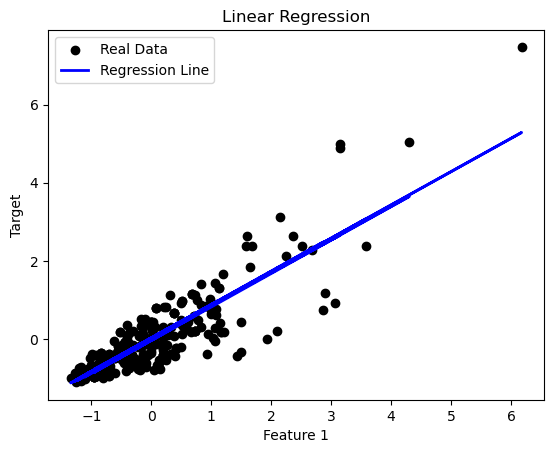

In [28]:
import matplotlib.pyplot as plt
# Visualizar la regresión
plt.scatter(x_test['superficie_construida'], y_test, color='black', label='Real Data')
plt.plot(x_test['superficie_construida'], y_pred, color='blue', linewidth=2
, label='Regression Line')

plt.title('Linear Regression')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()